## **Data Visualization**

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv('before_norm.csv',index_col=0)

In [4]:
df

,name,price,NFC,Color,Тип экрана,Диагональ,RAM,Память,Емкость акк,rating,reviews,OS
0,CORN C55 Pro,78990,0,черный,IPS,5.500,2.0,64.0,2600.0,0.0,0.000000,Android
1,CORN C55 Pro,79000,0,синий,IPS,5.500,2.0,64.0,2600.0,0.0,0.000000,Android
2,CORN X50,47990,0,черный,IPS,5.000,2.0,16.0,2000.0,0.0,0.000000,Android
3,CORN X50,53550,0,синий,IPS,5.000,2.0,16.0,2000.0,0.0,0.000000,Android
4,Blackview BV8900,129990,1,оранжевый,IPS,6.500,8.0,256.0,10000.0,4.9,10.566306,Android
...,...,...,...,...,...,...,...,...,...,...,...,...
3031,Coolpad CP12S,99000,1,черный,IPS,6.790,8.0,256.0,5000.0,5.0,10.566306,Android
3032,Coolpad CP12S,79000,1,зеленый,IPS,6.790,6.0,128.0,5000.0,4.7,10.566306,Android
3033,Coolpad CP12,54900,0,синий,IPS,6.517,4.0,64.0,4500.0,0.0,0.000000,Android
3034,Coolpad CP12,59000,0,синий,IPS,6.517,4.0,128.0,4500.0,0.0,0.000000,Android


In [5]:

df['brand'] = df['name'].apply(lambda x: str(x).split()[0] if isinstance(x, str) else None)


In [6]:
df

,name,price,NFC,Color,Тип экрана,Диагональ,RAM,Память,Емкость акк,rating,reviews,OS,brand
0,CORN C55 Pro,78990,0,черный,IPS,5.500,2.0,64.0,2600.0,0.0,0.000000,Android,CORN
1,CORN C55 Pro,79000,0,синий,IPS,5.500,2.0,64.0,2600.0,0.0,0.000000,Android,CORN
2,CORN X50,47990,0,черный,IPS,5.000,2.0,16.0,2000.0,0.0,0.000000,Android,CORN
3,CORN X50,53550,0,синий,IPS,5.000,2.0,16.0,2000.0,0.0,0.000000,Android,CORN
4,Blackview BV8900,129990,1,оранжевый,IPS,6.500,8.0,256.0,10000.0,4.9,10.566306,Android,Blackview
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,Coolpad CP12S,99000,1,черный,IPS,6.790,8.0,256.0,5000.0,5.0,10.566306,Android,Coolpad
3032,Coolpad CP12S,79000,1,зеленый,IPS,6.790,6.0,128.0,5000.0,4.7,10.566306,Android,Coolpad
3033,Coolpad CP12,54900,0,синий,IPS,6.517,4.0,64.0,4500.0,0.0,0.000000,Android,Coolpad
3034,Coolpad CP12,59000,0,синий,IPS,6.517,4.0,128.0,4500.0,0.0,0.000000,Android,Coolpad


In [7]:
df['price'].value_counts()

price
69990     31
39990     26
59990     26
49990     20
79990     19
          ..
41427      1
549999     1
106737     1
79887      1
216377     1
Name: count, Length: 1945, dtype: int64

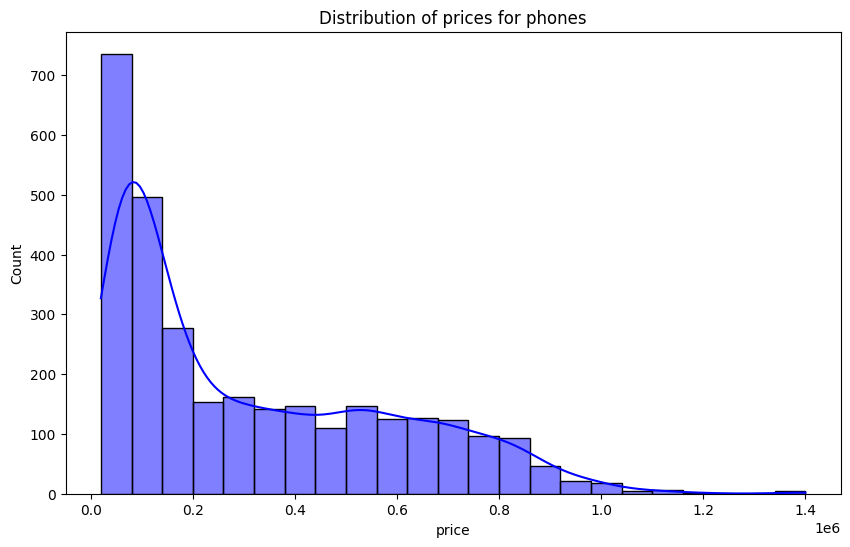

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of prices for phones')
plt.show()
#

C:\Temp\ipykernel_13848\2862356430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_avg_price.index, y=color_avg_price.values, palette='viridis')


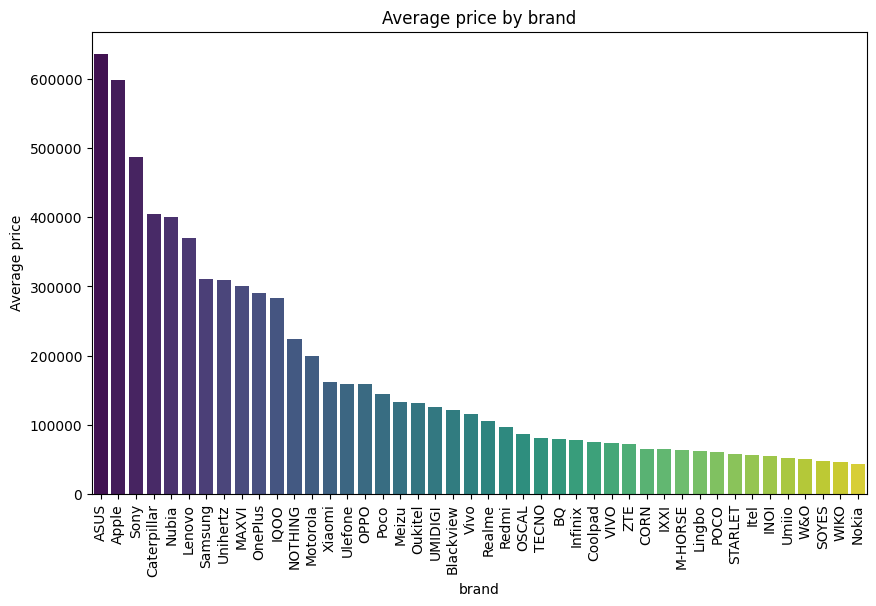

In [9]:
plt.figure(figsize=(10, 6))
color_avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=color_avg_price.index, y=color_avg_price.values, palette='viridis')
plt.title('Average price by brand')
plt.ylabel('Average price')
plt.xticks(rotation=90)
plt.show()


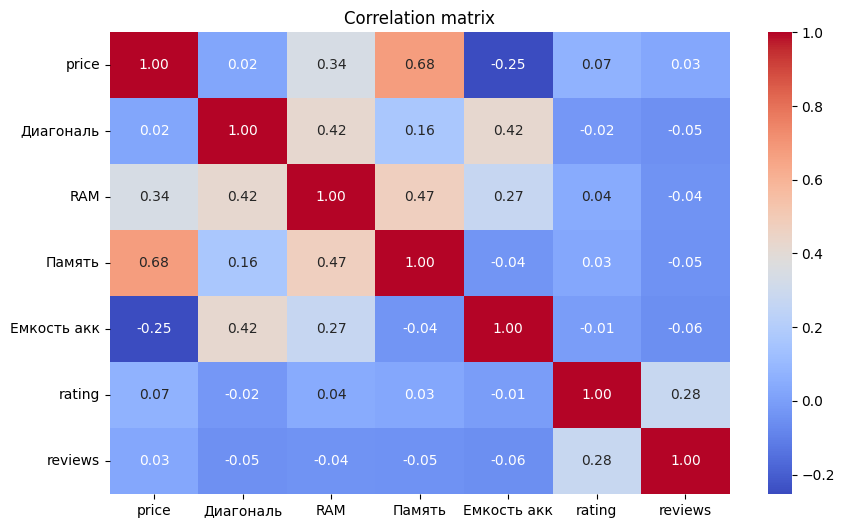

In [10]:
corr_matrix = df[['price', 'Диагональ', 'RAM', 'Память', 'Емкость акк', 'rating', 'reviews']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()


In [11]:
print("Mode for color:", df['Color'].mode()[0])
print("Mode for screen type :", df['Тип экрана'].mode()[0])
print("Средняя цена:", df['price'].mean())
print("Median:", df['price'].median())

Mode for color: черный
Mode for screen type : OLED
Средняя цена: 314610.0606060606
Median: 200000.0


In [12]:
max_price = df['price'].max()
#max price of the phone
most_expensive_phones = df[df['price'] == max_price][['name', 'price']]
#we need only name and the price
print("Most expensive phone's:")
for _, row in most_expensive_phones.iterrows():
    print(f"{row['name']}: {row['price']}")

#also the min price
min_price = df['price'].min()

cheapest_phones = df[df['price'] == min_price][['name', 'price']]

print("Cheapest phones:")
for _, row in cheapest_phones.iterrows():
    print(f"{row['name']}: {row['price']}")


Most expensive phone's:
ASUS ROG Phone 7 Ultimate  : 1399990
ASUS ROG Phone 7 Ultimate  : 1399990
Cheapest phones:
INOI A22 Lite  : 19941


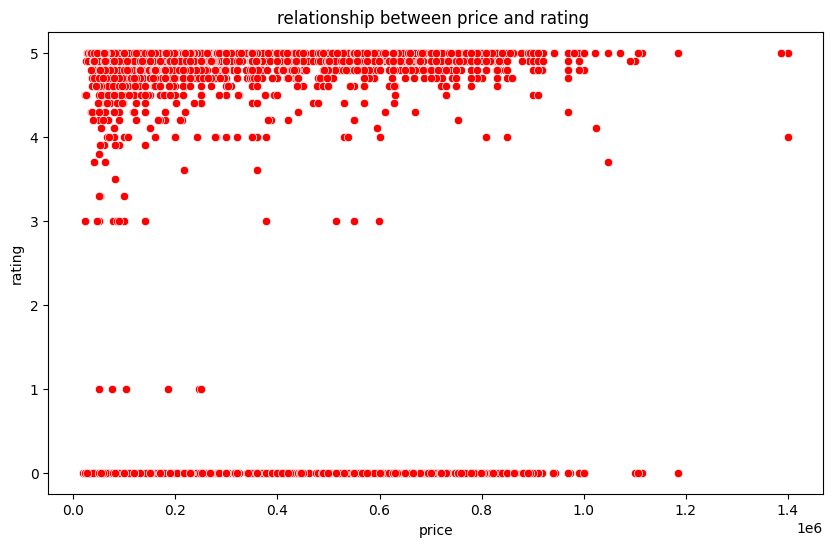

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['rating'], color='red')
plt.title('relationship between price and rating ')
plt.show()
#the 4-5 ratings smartphones bought more often others